In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# remove warnings
import warnings
warnings.filterwarnings("ignore")

import wrangle

In [140]:
# acquire data using function in wrangle
df = wrangle.get_telco_data()

In [141]:
# clean acquired data
df = wrangle.wrangle_telco(df)

There are no duplicate rows in your dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB
None


## 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [142]:
train, test = train_test_split(df, train_size=0.8, random_state=123)

In [143]:
train, validate = train_test_split(train, train_size=0.7, random_state=123)

In [144]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

In [11]:
tc_corr = train.drop(columns=['customer_id']).corr()
tc_corr

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.424806,0.941523
tenure,0.424806,1.000000,0.650009
total_charges,0.941523,0.650009,1.000000


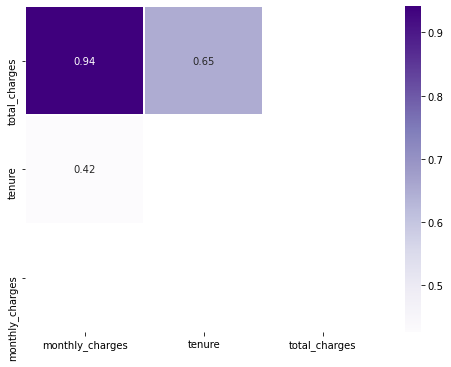

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(tc_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(tc_corr))
plt.ylim(0, 3)

plt.show()

## Takeaways:

-  Highest correlation of total_charges with monthly_charges
- Next highest correlation of tenure and total_charges

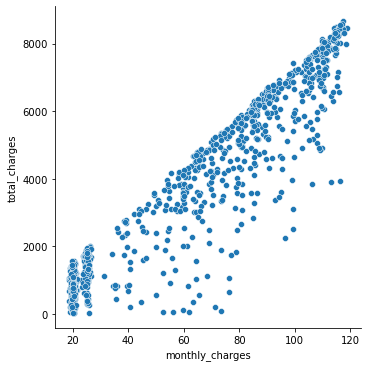

In [18]:
sns.relplot(x="monthly_charges", y="total_charges", data=train)
plt.show()

## Takeaways:

- The relationship seems somewhat linear
- As monthly charges increase so do total charges

## 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 1256 to 1593
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      949 non-null    object 
 1   monthly_charges  949 non-null    float64
 2   tenure           949 non-null    int64  
 3   total_charges    949 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 37.1+ KB


In [162]:
def plot_variable_pairs(df):
    '''
    This function takes in a dataframe and creates a pairwise plot along with a regression line.
    '''
    new_df = df.drop(columns=['customer_id'])
    cols = new_df.columns.to_list()
#     for i in range(0,len(cols)):
#         for j in range(i, len(cols)):
#             if (i!=j):
#                 sns.lmplot(x=cols[i], y=cols[j], data=new_df, line_kws={'color': 'red'})
#                 plt.title(cols[i] + ' vs ' + cols[j])
#                 plt.show()
    #pairwise relationships
    sns.pairplot(new_df[cols], corner=True, kind="reg", plot_kws={'line_kws':{'color':'red'}})
    plt.show()

    

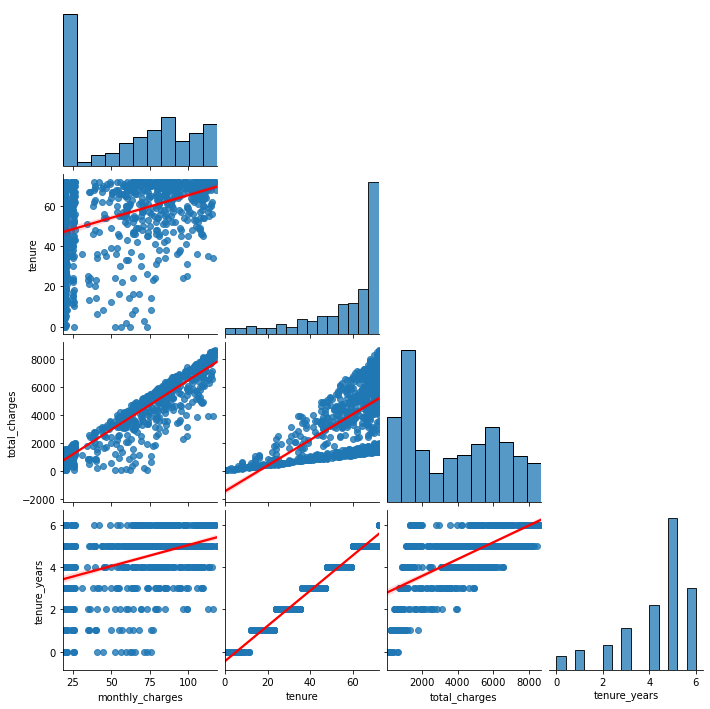

In [163]:
plot_variable_pairs(train)

## 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.



In [138]:
def months_to_years(df):
    df['tenure_years'] = np.floor(df['tenure']/12).astype(int)
    return df

In [145]:
months_to_years(train)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
1256,7501-IWUNG,73.80,61,4616.05,5
225,1303-SRDOK,69.05,55,3842.60,4
662,3967-VQOGC,24.90,67,1680.25,5
628,3777-XROBG,19.55,58,1079.65,4
824,5075-JSDKI,24.45,59,1493.10,4
...,...,...,...,...,...
441,2664-XJZNO,104.90,72,7559.55,6
98,0567-XRHCU,43.95,69,2960.10,5
886,5334-AFQJB,25.10,72,1789.90,6
322,2001-MCUUW,108.65,46,4903.20,3


## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [164]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    '''
    This function takes in a df and list of categorical and continuous variables and plots a boxplot, swarmplot
    as well as a barplot to show the distribution of continuous variables against the categorical ones.
    '''
    for cat in cat_vars:
        for cont in cont_vars:
            # creates a boxplot
            sns.boxplot(x=cat, y=cont, data=df)
            plt.title('Distribution of ' + cont)
            plt.show()
            
            # creates a swarmplot
            sns.swarmplot(x=cat, y=cont, data=df)
            plt.show()
            
            # creates a stripplot
            sns.stripplot(x=cat, y=cont, data=df)
            plt.show()
            
            # make sure separate plots are created 
            plt.tight_layout()

In [159]:
train.columns.to_list()

['customer_id', 'monthly_charges', 'tenure', 'total_charges', 'tenure_years']

In [158]:
train.tenure_years.value_counts()

5    362
6    195
4    154
3     99
2     59
1     48
0     32
Name: tenure_years, dtype: int64

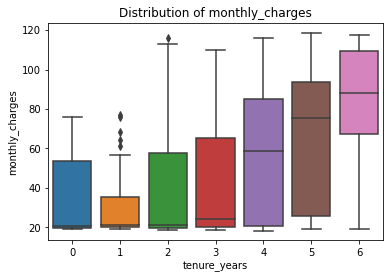

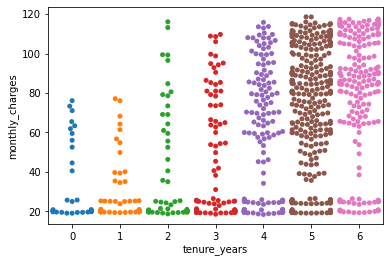

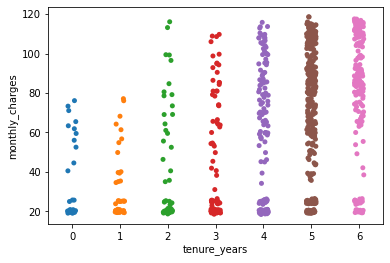

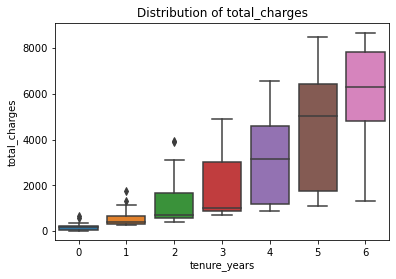

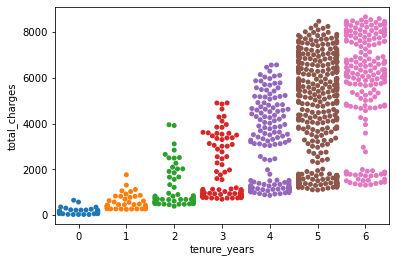

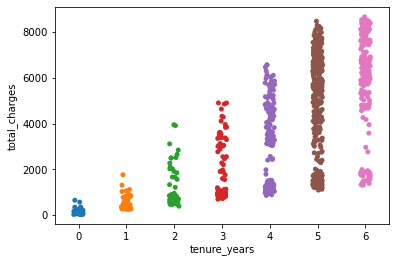

<Figure size 432x288 with 0 Axes>

In [157]:
# tenure_years is discrete here
cat_vars = ['tenure_years']
cont_vars = ['monthly_charges', 'total_charges']

plot_categorical_and_continuous_vars(train, cat_vars, cont_vars)

## Takeaways:

- Many customers with 4 and 5 years of tenure 
- Monthly & total charges increase with tenure 
- Median monthly and total charges highest in year 6 of tenure
- Some outliers in the first few years of tenure

## 7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

>go to explore_mall_customers notebook